In [1]:
!apt install git

# Change to your working directory
%cd /content

# Clone the shared GitHub repository
!git clone https://github.com/Adamsomondi/BANK-CHURN-PREDICTION.git

# Move into the repo
%cd BANK-CHURN-PREDICTION

# Checks the contents of the repository
!ls -la

# Ensures you are in the correct repository
%cd /content/BANK-CHURN-PREDICTIO

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/content
Cloning into 'BANK-CHURN-PREDICTION'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 258 (delta 26), reused 7 (delta 5), pack-reused 214 (from 3)
Receiving objects: 100% (258/258), 400.03 KiB | 3.28 MiB/s, done.
Resolving deltas: 100% (77/77), done.
/content/BANK-CHURN-PREDICTION
total 396
drwxr-xr-x 3 root root   4096 Mar 27 09:20 .
drwxr-xr-x 1 root root   4096 Mar 27 09:20 ..
-rw-r--r-- 1 root root  32380 Mar 27 09:20 Data_Preprocessing.ipynb
-rw-r--r-- 1 root root 345107 Mar 27 09:20 Eda_Analysis.ipynb
drwxr-xr-x 8 root root   4096 Mar 27 09:20 .git
-rw-r--r-- 1 root root     44 Mar 27 09:20 .gitignore
-rw-r--r-- 1 root root   6326 Mar 27 09:20 README.md
[

In [8]:
import pandas as pd

# Correct direct file link
file_id = "1-6FhvYRRgceTptrIMfgvaXkq-QKw8dwf"
file_url = f"https://drive.google.com/uc?id={file_id}"# Load the dataset
df = pd.read_csv(file_url)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [6]:
#Data preprocessing

#Identifying missing values
missing_values = df.isnull().sum()
print(missing_values)

# Encode Categorical Variables
# Check data types to identify categorical variables
print(df.dtypes)

# Example: One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Scale Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

from sklearn.preprocessing import StandardScaler

# Example: Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
# Resolved Data Quality Issues
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df[numerical_features])) < 3).all(axis=1)]

# Removed duplicate rows
df.drop_duplicates(inplace=True)

# Create a 'data' directory if it doesn't exist
import os
os.makedirs('data', exist_ok=True)

# Save Cleaned Data
cleaned_data_path = "data/cleaned_data.csv"

# Save the DataFrame to a CSV file
df.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")

# Create the .gitignore file
gitignore_path = ".gitignore"
ignore_entry = "data/cleaned_data.csv\n"
# Ensure the .gitignore file exists and contains the ignore entry
with open(gitignore_path, 'a') as f:
    f.write(ignore_entry)

print("Updated .gitignore to exclude data/cleaned_data.csv")


RowNumber             0
CustomerId            0
CreditScore           0
Age                   0
Tenure                0
                     ..
Geography_Spain       0
Gender_Male           0
Card Type_GOLD        0
Card Type_PLATINUM    0
Card Type_SILVER      0
Length: 2951, dtype: int64
RowNumber             float64
CustomerId            float64
CreditScore           float64
Age                   float64
Tenure                float64
                       ...   
Geography_Spain          bool
Gender_Male              bool
Card Type_GOLD           bool
Card Type_PLATINUM       bool
Card Type_SILVER         bool
Length: 2951, dtype: object
Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')
Cleaned data saved to data/cleaned_data.csv
Updated .gitignore to exclude data/cleaned_data.csv


In [7]:
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-1.729510,-0.783687,-0.327879,0.374169,-1.041776,-1.225443,-0.935749,0.646281,0.980094,0.022951,...,False,False,False,False,False,False,False,False,False,False
1,-1.729164,-0.606962,-0.442063,0.270681,-1.387705,0.117543,-0.935749,-1.547314,0.980094,0.217648,...,False,False,False,False,False,True,False,False,False,False
2,-1.728818,-0.996412,-1.542374,0.374169,1.033798,1.333055,2.694979,0.646281,-1.020310,0.241807,...,False,False,False,False,False,False,False,False,False,False
3,-1.728472,0.144531,0.502545,0.063705,-1.387705,-1.225443,0.879615,-1.547314,-1.020310,-0.107887,...,False,False,False,False,False,False,False,True,False,False
4,-1.728125,0.652553,2.069970,0.477658,-1.041776,0.785816,-0.935749,0.646281,0.980094,-0.364310,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.730723,-1.178226,1.249926,0.063705,-0.003989,-1.225443,0.879615,0.646281,-1.020310,-0.065377,...,False,False,False,False,False,False,True,False,False,False
9996,1.731069,-1.683509,-1.397050,-0.350248,1.725655,-0.306119,-0.935749,0.646281,0.980094,0.029054,...,False,False,False,False,False,False,True,False,True,False
9997,1.731415,-1.479933,0.606348,-0.246760,0.687869,-1.225443,-0.935749,-1.547314,0.980094,-1.007840,...,False,False,False,False,False,False,False,False,False,True
9998,1.731762,-0.119659,1.260306,0.374169,-0.695847,-0.022392,0.879615,0.646281,-1.020310,-0.124204,...,False,False,False,False,True,False,True,True,False,False


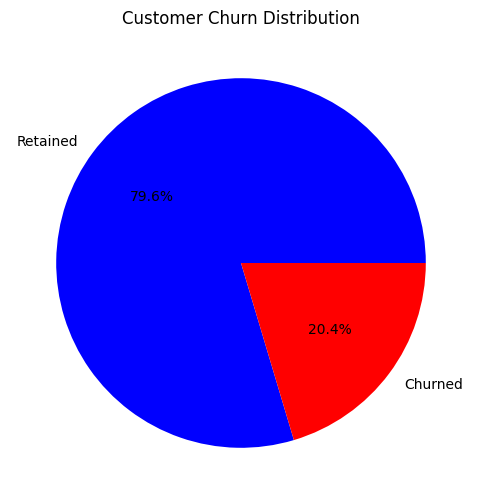

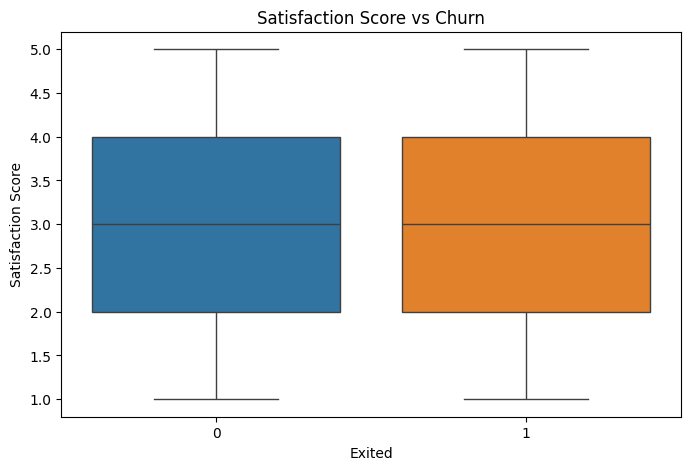

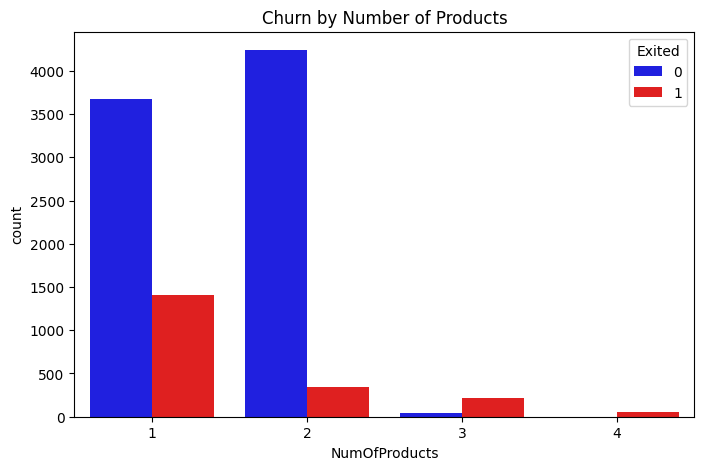

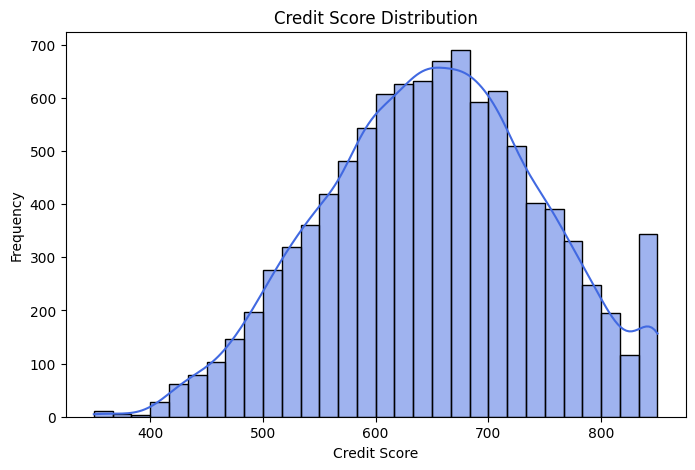

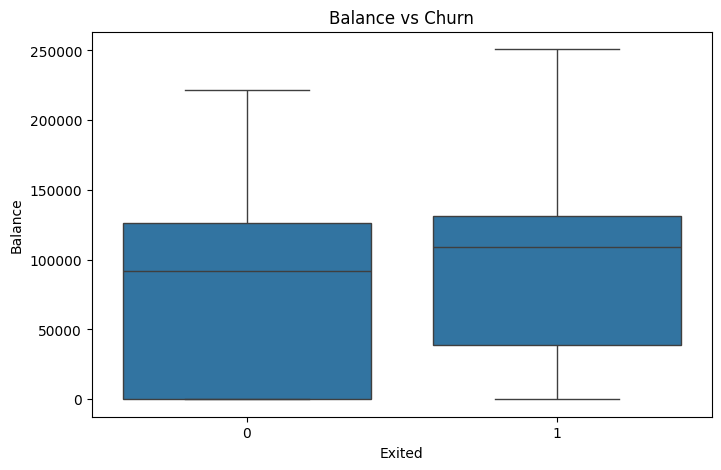

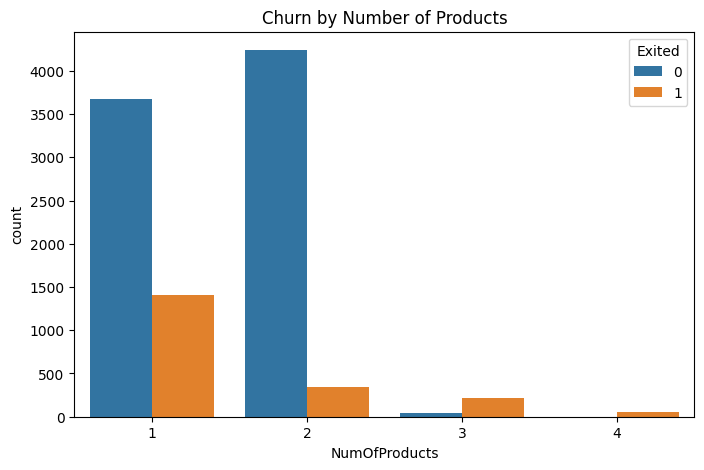

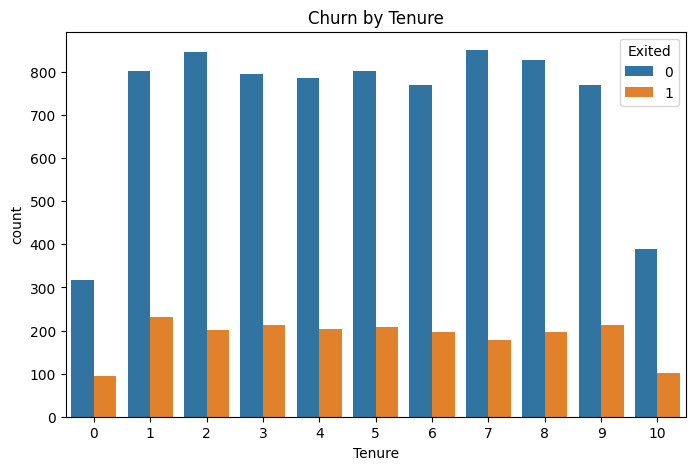

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
churn_counts = df["Exited"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=["Retained", "Churned"], autopct="%1.1f%%", colors=["blue", "red"])
plt.title("Customer Churn Distribution")
plt.show()

# Churn by Customer Satisfaction Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Satisfaction Score", data=df, hue="Exited", legend=False)
plt.title("Satisfaction Score vs Churn")
plt.show()

# Churn by Number of Products
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df, palette=["blue", "red"])
plt.title("Churn by Number of Products")
plt.show()

# Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["CreditScore"], bins=30, kde=True, color="royalblue")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()

# Balance vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

# Number of Products vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="NumOfProducts", hue="Exited", data=df)
plt.title("Churn by Number of Products")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x="Tenure", hue="Exited", data=df)
plt.title("Churn by Tenure")
plt.show()

In [ ]:
#ndanu Modelling



In [13]:
#Replace you-branch-name with what you are working on i.e edaanalysis,datacleaning, etc..
!git checkout -b data-modelling -q #meaning quite mode

In [15]:
from google.colab import drive
drive.mount('/content/drive')

!ls -la "/content/drive/My Drive/Colab Notebooks"
!find "/content/drive/My Drive" -name "Modelling.ipynb" #replace "Data_Preprocessing.ipynb" with the name of your file i.e edaanalysis.ipynb

!cp "/content/drive/My Drive/Colab Notebooks/Modelli.ipynb" /content/BANK-CHURN-PREDICTION/ #replace Data_Preprocessing.ipynb with the name of your file

!ls -la "/content/BANK-CHURN-PREDICTION/"

SyntaxError: invalid syntax (<ipython-input-15-cf9b51aac60d>, line 5)